In [1]:
import numpy as np
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## loading data

In [2]:
train = pd.read_csv('./data/diamonds_train.csv.zip')
test = pd.read_csv('./data/diamonds_predict.csv')
sample_sub = pd.read_csv('./data/sample_submission.csv')


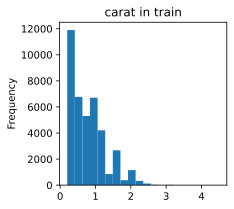

In [3]:
train['carat'].plot(kind='hist', bins=20,title='carat in train', figsize=(3,3));

## Model

In [4]:
target = 'price' #what we want to predict
cat_features = ['cut', 'color', 'clarity']#cathegorycal
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']#numerical

for cat_feat in  cat_features:
    train[cat_feat] = train[cat_feat].astype('category')
    test[cat_feat] = test[cat_feat].astype('category')
    
cat_df = pd.get_dummies(train[cat_features]) #substitutes scores for 0 and 1
num_df = train.loc[:,num_features]
train_df = pd.concat([cat_df, num_df], axis=1)#column concatenation


cat_df = pd.get_dummies(test[cat_features])
num_df = test.loc[:,num_features]
test_df = pd.concat([cat_df, num_df], axis=1)


In [5]:
features = list(cat_df.columns) + list(num_df.columns)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #to standarize the features by removing the mean and scaling to unit variance

X = scaler.fit_transform(train_df.loc[:,features].values)
y = train[target]

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X, y=y)

LinearRegression()

## Submission

In [9]:
X_test = scaler.transform(test_df.loc[:,features].values)

y_hat = model.predict(X_test).clip(360,33000)
submission = pd.DataFrame({'id':test['id'], 'price':y_hat})

submission.to_csv('./submissions/lr_submission.csv', index=False)